<h1 style="text-align: center;">Breast Cancer Survival Analysis</h1>

<h2 style="text-align: center;">Tumor Stage, Receptor Status, and Patient Outcomes</h2>

<p style="text-align: center;">Natalie Alba | July 2025</p>


**Dataset:** This analysis uses an anonymized breast cancer dataset obtained from Kaggle. All patient identifiers have been removed to protect privacy.  
**Source:** [Kaggle Breast Cancer Dataset](https://www.kaggle.com/datasets/amandam1/breastcancerdataset)

**Table of Contents**
1. [Introduction](#Introduction)
2. [Data Import & Cleaning](#Data-Import-&-Cleaning)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Statistical Testing](#Statistical-Testing)
5. [Conclusions](#Conclusions)
6. [Limitations & Future Work](#Limitations-&-Future-Work)


## Introduction

**Context**

This project investigates a breast cancer dataset to uncover relationships between tumor characteristics, treatment decisions, and patient outcomes. Through data cleaning, visualization, and statistical analysis, I explore trends in tumor stage, protein expression, receptor status, surgical choices, and survival. The goal is to highlight insights relevant to clinical decision-making and potential biomarkers, demonstrating end-to-end data analysis and technical skills.

**Exloratory Questions**

1. How does patient age influence tumor stage at diagnosis?
2. Do protein expression levels predict tumor stage progression?
3. Are certain receptor statuses (ER, PR, HER2) more prevalent in advanced tumor stages?
4. How do surgical choices vary across tumor stages?
5. What impact do tumor stages and receptor statuses have on patient survival?

## Data Import & Cleaning

**Raw Data Preview**

Below is a preview of the original dataset before cleaning:


In [2]:
import pandas as pd

raw_df = pd.read_csv('BRCA_fixed.csv')
raw_df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


**Data Cleaning Process**

1. Load Raw Data

In [3]:
import pandas as pd

df = pd.read_csv('BRCA_fixed.csv', skip_blank_lines=True)
df = df.dropna(how='all')

2. Handle Missing Values

In [4]:
# Missing values found in 'Patient_Status' will be replaced with 'Unknown
# Nulls in 'Date_of_Last_Visit' will be kept for ease of survival_date calculations

df['Patient_Status'] = df['Patient_Status'].fillna('Unknown')


3. Convert Dates + Create Features

A new column called 'survival_days' is created by subtracting the 'Date_of_Surgery' from 'Date_of_Last_Visit' to explore survival analysis. Once created, will compare and anlalyze the trends and potential factors for varying survival times: age, surgery type, receptor status, and tumor stage.

In [5]:
# Dates are converted to typical year-month-date format (e.g. 2017-02-24)

df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y', errors='coerce')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y', errors='coerce')

# Create survival_days column to compare survival times later

df['survival_days'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

4. Standardize Categorical Columns

In [6]:
# Standardize categoricals

cat_col = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'Patient_Status']
for col in cat_col:
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].astype('category')


# Convert categories back to strings for CSV before saving!

for col in cat_col:
    df[col] = df[col].astype(str)

for col in cat_col:
    if col == 'Tumour_Stage':
        df[col] = df[col].astype(str).str.strip().str.upper()  # handles capitalization format in this column e.g., "iii" → "III"
    else:
        df[col] = df[col].astype(str).str.strip().str.title()  # normal title case for others (typical Title format)
    df[col] = df[col].astype('category')

5. Save Cleaned Dataset

Here, the cleaned dataset is saved as 'BRCA_cleaned.csv' for reproducability and backup (raw file is not modified or overwritten).

In [7]:
df.to_csv('BRCA_cleaned.csv', index=False)

print(df.tail(20))

       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
314  TCGA-LD-A66U  44.0  Female  0.891850   0.44440   0.11020  0.156850   
315  TCGA-E2-A156  61.0  Female -0.405920   2.75130  -0.59542  0.816390   
316  TCGA-AO-A0JJ  54.0  Female -1.231300  -0.76767   0.86160  0.239050   
317  TCGA-E2-A14Z  64.0  Female  0.975800   2.48470  -0.51332  0.666980   
318  TCGA-A2-A0SU  66.0  Female -0.370430   1.91850  -0.79608 -0.062903   
319  TCGA-A7-A13G  79.0  Female -1.062200   1.16640  -0.65565 -0.092381   
320  TCGA-BH-A0BR  59.0  Female  0.452300   1.39590  -0.23084  0.796310   
321  TCGA-A8-A083  67.0  Female  0.317420  -0.55585   0.35657  0.797330   
322  TCGA-BH-A0HU  52.0  Female  0.240800   1.73480   0.33109  1.044100   
323  TCGA-AO-A1KP  77.0  Female  0.339120   1.31930   0.58740  0.351920   
324  TCGA-AR-A2LQ  59.0  Female  0.150500   1.26740   0.64265  0.261420   
325  TCGA-BH-A0BV  78.0  Female -0.917230  -0.64693   0.55259  0.458740   
326  TCGA-AO-A1KO  46.0  


**Cleaned Data Preview**

After handling missing values, converting dats, and standardizing categories, a cleaned version of the dataset can now be used for analysis:

In [8]:
df = pd.read_csv('BRCA_cleaned.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,survival_days
0,TCGA-D8-A1XD,36.0,Female,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,155.0
1,TCGA-EW-A1OX,43.0,Female,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,562.0
2,TCGA-A8-A079,69.0,Female,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,274.0
3,TCGA-D8-A1XR,56.0,Female,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,168.0
4,TCGA-BH-A0BF,56.0,Female,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,782.0


**Upload Cleaned Data to MySQL**

The cleaned dataset will now be pused to the MySQL database 'Breast_Cancer' in the table 'brca_cleaned'.

In [9]:
from sqlalchemy import create_engine

username = 'root'        
from getpass import getpass
password = getpass("Enter MySQL password: ") 
host = 'localhost'     
database = 'Breast_Cancer' 

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

df.to_sql('brca_cleaned', con=engine, if_exists='replace', index=False)

print("MySQL table 'brca_cleaned' updated successfully!")


Enter MySQL password:  ········


MySQL table 'brca_cleaned' updated successfully!



## Exploratory Data Analysis

This section explores patterns, trends, and insights in the BRCA dataset, focusing on tumor characteristics, patient demographics, and survival outcomes.


**Question 1: How does patient age influence tumor stage at diagnosis?**

Here, I will investigate whether patient age differs by tumor stage using average age, min/max, and interquartile range (IQR) statistics.

In [10]:
#Finding max and min ages for each tumor stage

query1 = """
SELECT AVG(Age) AS avg_age,
    MAX(Age) AS max_age,
    MIN(Age) AS min_age,
    Tumour_Stage
FROM brca_cleaned
GROUP BY Tumour_Stage
ORDER BY Tumour_Stage ASC
;
"""

df_age_stats = pd.read_sql(query1, con = engine)
df_age_stats

,avg_age,max_age,min_age,Tumour_Stage
0,62.359375,89.0,29.0,I
1,59.052910,88.0,29.0,II
2,55.753086,90.0,36.0,III


In [11]:
query2 = """
WITH ranked AS (
    SELECT
        Tumour_Stage,
        Age,
        ROW_NUMBER() OVER (PARTITION BY Tumour_Stage ORDER BY Age) AS rn,
        COUNT(*) OVER (PARTITION BY Tumour_Stage) AS cnt
    FROM brca_cleaned
)
SELECT
    t1.Tumour_Stage,
    t3.Age AS Q3,
    t1.Age AS Q1,
    t3.Age - t1.Age AS IQR
FROM ranked t1
JOIN ranked t3
    ON t1.Tumour_Stage = t3.Tumour_Stage
    AND t1.rn = FLOOR(t1.cnt * 0.25) + 1
    AND t3.rn = FLOOR(t3.cnt * 0.75) + 1;
"""

df_iqr = pd.read_sql(query2, con = engine)
df_iqr

,Tumour_Stage,Q3,Q1,IQR
0,I,76.0,52.0,24.0
1,II,68.0,50.0,18.0
2,III,62.0,47.0,15.0


**Summary of Findings:**

- **Average age decreases as tumor stage progresses**
  - Stage I: ~62 years
  - Stage II: ~59 years
  - Stage III: ~56 years


- **Younger patients are more common in higher stages**
  - Q1 decreases from 52 (Stage I) to 47 (Stage III).
  - Indicates more younger patients present in advanced stages.

- **Age variation narrows with stage**
  - IQR: Stage I = 24 years -> Stage III = 15 years.
  - Suggest easly-stage patients have more diverseages, later-stage patients are clustered.

- **Min/Max pattersn**
  - Min age: Stage I & II = 29 years; Stage III = 36 years
  - Max age: ~88-90 across all stages

**Interpretation:**

Older patients are more common in Stage I, but younger patients show up more often in advanced stages. Age variability is highest in early stages and narrows as the disease advanaces.

In [12]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


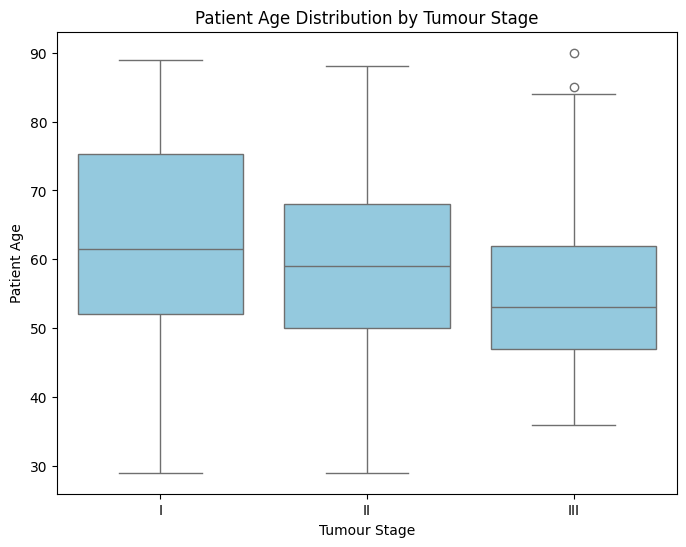

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(
    x='Tumour_Stage',
    y='Age',
    data=df,
    color='skyblue',           
    order=['I', 'II', 'III']   
)
plt.title('Patient Age Distribution by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Patient Age')
plt.show()


Figure 1: Stage III shows two older outliers in patient age. While most Stage III patients are younger on average, these older cases slightly increase the maximum age but do not change the overall trend that higher stages are more frequently observed in younger patients.


**Question 2: Do protein expression levels predict tumor stage progression?**

Here, I will examine whether or not the average expression levels of Proteins 1-4 change systematically across tumor stages (I-III). 

In [14]:
#Finding protein average for each protein for each tumor stage

query3 = """
SELECT Tumour_Stage,
       AVG(Protein1) AS avg_protein1,
       AVG(Protein2) AS avg_protein2,
       AVG(Protein3) AS avg_protein3,
       AVG(Protein4) AS avg_protein4
FROM brca_cleaned
GROUP BY Tumour_Stage
ORDER BY FIELD(Tumour_Stage, 'I','II','III');
"""

df_proteins_avg = pd.read_sql(query3, con = engine)
df_proteins_avg

,Tumour_Stage,avg_protein1,avg_protein2,avg_protein3,avg_protein4
0,I,-0.014430,1.001318,-0.165147,0.037828
1,II,-0.007734,0.964763,-0.065409,0.018023
2,III,-0.094220,0.862207,-0.088845,-0.031453


In [15]:
#Finding protein standard deviations for each protein for each tumor stage

query4 = """
SELECT Tumour_Stage,
	STDDEV(Protein1) AS sd_p1, 
    STDDEV(Protein2) AS sd_p2, 
    STDDEV(Protein3) AS sd_p3, 
    STDDEV(Protein4) AS sd_p4
FROM brca_cleaned
GROUP BY Tumour_Stage
ORDER BY FIELD(Tumour_Stage, 'I', 'II', 'III');
"""

df_proteins_sd = pd.read_sql(query4, con = engine)
df_proteins_sd

,Tumour_Stage,sd_p1,sd_p2,sd_p3,sd_p4
0,I,0.519845,0.896433,0.509595,0.608021
1,II,0.550112,0.879692,0.595760,0.638237
2,III,0.617011,0.982754,0.607073,0.617861


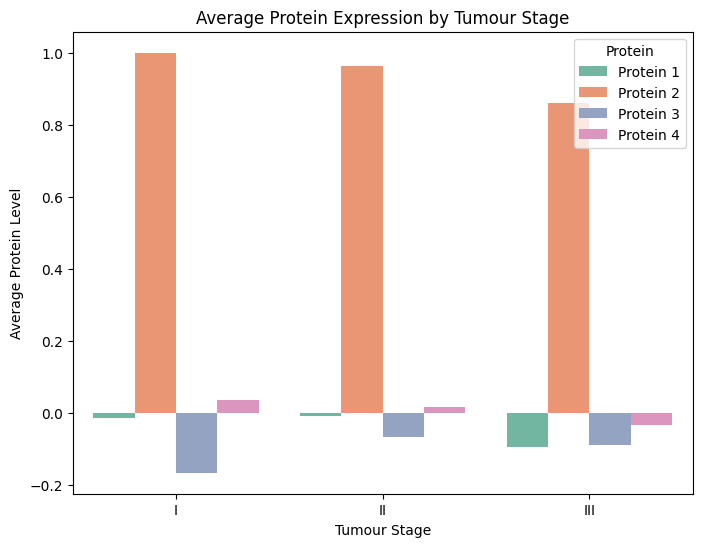

In [16]:
#Creating visuals to compare protein averages across stages

stages = ['I', 'II', 'III']
protein1 = [-0.01443, -0.00773, -0.09422]
protein2 = [1.00132, 0.96476, 0.86221]
protein3 = [-0.16514, -0.06540, -0.08884]
protein4 = [0.03782, 0.01802, -0.03145]


protein_data = {
    'Stage': stages*4,
    'Protein': ['Protein 1']*3 + ['Protein 2']*3 + ['Protein 3']*3 + ['Protein 4']*3,
    'Average_Level': protein1 + protein2 + protein3 + protein4
}



df_plot = pd.DataFrame(protein_data)

plt.figure(figsize=(8,6))
sns.barplot(x='Stage', y='Average_Level', hue='Protein', data=df_plot, palette='Set2')
plt.title('Average Protein Expression by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Average Protein Level')
plt.legend(title='Protein')
plt.show()


Figure 2: Displays the patterns between Proteins 1-4.


**Summary of Findings**

- Analysis of average protein expression levels across tumor stages reveals distinct trends:
  - Protein 2 and Protein 4 show a clear downward trend from Stage I to Stage III, suggesting that lower levels may signal more advanced tumors
  - Protein 1 decreases noteably at Stage III, but the change is less consistent than Protein 2 and 4
  - Protein 3 exhibits a non-linear pattern, rising slightly at Stage II before dropping again at Stage III, indicating it may not be a straightforward marker of progression

- Analysis of variability reveals:
  - Most proteins show stable or slightly increasing variability across stages, reflecting greater heterogeneity in expression among patients with advanced disease.


**Interpretation**

These trends suggest that Protein 2 and 4 are the strongest candidates for biomarkers of tumor stage progression. Protein 1 may also contribute, though less strongly as it has a weaker association with stage progression. Protein 3's non-linear behavior indicates additional factors may influence its expression. Monitoring these proteins could help predict tumor severity and guide further research on prognstic markers.



**Question 3: Are certain receptor statuses (ER, PR, HER2) more prevalent in advanced tumor stages?**

Here, I will examine whether or not hormone and growth factor receptor statuses vary with tumor stage, highlighting potential biomarkers for disease progression.

In [17]:
#Shows the ER status for each stage, along with their count

query5 = """
SELECT Tumour_Stage,
       `ER status` AS ER_Status,
       COUNT(*) AS count_ER
FROM brca_cleaned
GROUP BY Tumour_Stage, `ER status`
ORDER BY FIELD(Tumour_Stage, 'I','II','III'), ER_Status;
"""

df_er_status = pd.read_sql(query5, con = engine)
df_er_status

,Tumour_Stage,ER_Status,count_ER
0,I,Positive,64
1,II,Positive,189
2,III,Positive,81


In [18]:
#Shows the PR status for each stage, along with their count

query6 = """
SELECT Tumour_Stage,
       `PR status` AS PR_Status,
       COUNT(*) AS count_PR
FROM brca_cleaned
GROUP BY Tumour_Stage, `PR status`
ORDER BY FIELD(Tumour_Stage, 'I','II','III'), PR_Status;
"""

df_pr_status = pd.read_sql(query6, con = engine)
df_pr_status

,Tumour_Stage,PR_Status,count_PR
0,I,Positive,64
1,II,Positive,189
2,III,Positive,81


In [19]:
#Shows the HER2 status for each stage, along with their count

query7 = """
SELECT Tumour_Stage,
       `HER2 status` AS HER2_Status,
       COUNT(*) AS count_HER2
FROM brca_cleaned
GROUP BY Tumour_Stage, `HER2 status`
ORDER BY FIELD(Tumour_Stage, 'I','II','III'), HER2_Status;
"""

df_her2_status = pd.read_sql(query7, con = engine)
df_her2_status

,Tumour_Stage,HER2_Status,count_HER2
0,I,Negative,61
1,I,Positive,3
2,II,Negative,176
3,II,Positive,13
4,III,Negative,68
5,III,Positive,13


There seems to be no variation in receptor status for ER and PR receptors (positive across all stages of the disease). However, HER2 status shows positives and negatives across all three stages. Because count is inconsistent and may make results misleading, I will instead inspect the percentages of HER2 statuses for each tumor stage for a more accurate representation.

In [20]:
#Shows the percentage of positives and negatives for HER2
#Only HER2 is considered since ER and PR both only have positives (no variation in receptor status)

query8 = """
SELECT Tumour_Stage,
       `HER2 status` AS HER2_Status,
       COUNT(*) * 100.0 / (SELECT COUNT(*) FROM brca_cleaned b2 WHERE b2.Tumour_Stage = b1.Tumour_Stage) AS percentage
FROM brca_cleaned b1
GROUP BY Tumour_Stage, `HER2 status`
ORDER BY FIELD(Tumour_Stage, 'I','II','III'), HER2_Status;
"""

df_her2_percent = pd.read_sql(query8, con = engine)
df_her2_percent


,Tumour_Stage,HER2_Status,percentage
0,I,Negative,95.31250
1,I,Positive,4.68750
2,II,Negative,93.12169
3,II,Positive,6.87831
4,III,Negative,83.95062
5,III,Positive,16.04938


After looking at the percentages of positives and negatives for HER2, positives appear to increase with stage progression.

I will now look at what stage each receptor status is either positive or negative to determine if there are patterns within early stages (I-II) and late stages (III) of the disease.

In [21]:
#Groups ER status results in either early or late depending on the tumor stage they were found in

query9 = """
SELECT 
    CASE WHEN Tumour_Stage IN ('I','II') THEN 'Early' ELSE 'Late' END AS Stage_Group,
    `ER status` AS ER_Status,
    COUNT(*) AS count
FROM brca_cleaned
GROUP BY Stage_Group, `ER status`;
"""

df_er_group = pd.read_sql(query9, con = engine)
df_er_group

,Stage_Group,ER_Status,count
0,Late,Positive,81
1,Early,Positive,253


In [22]:
#Groups PR status results in either early or late depending on the tumor stage they were found in

query10 = """
SELECT 
    CASE WHEN Tumour_Stage IN ('I','II') THEN 'Early' ELSE 'Late' END AS Stage_Group,
    `PR status` AS PR_Status,
    COUNT(*) AS count
FROM brca_cleaned
GROUP BY Stage_Group, `PR status`;
"""

df_pr_group = pd.read_sql(query10, con = engine)
df_pr_group

,Stage_Group,PR_Status,count
0,Late,Positive,81
1,Early,Positive,253


In [23]:
#Groups HER2 status results in either early or late depending on the tumor stage they were found in

query11 = """
SELECT 
    CASE WHEN Tumour_Stage IN ('I','II') THEN 'Early' ELSE 'Late' END AS Stage_Group,
    `HER2 status` AS HER2_Status,
    COUNT(*) AS count
FROM brca_cleaned
GROUP BY Stage_Group, `HER2 status`;
"""

df_her2_group = pd.read_sql(query11, con = engine)
df_her2_group

,Stage_Group,HER2_Status,count
0,Late,Negative,68
1,Early,Negative,237
2,Early,Positive,16
3,Late,Positive,13


**Summary of Findings**

- ER and PR: Consistent positivity across all tumor stages
- HER2: Positivity increases in later stages (Stage I: ~5% -> Stage III: 16%)

**Interpretation**

ER and PR receptor positivity remains consistently high across all tumor stages, indicating that these hormone receptors are not strongly associated with disease progression. In contrast, HER2 positivity increases in later stages, rising from ~5% in Stage I to 16% in Stage III. 

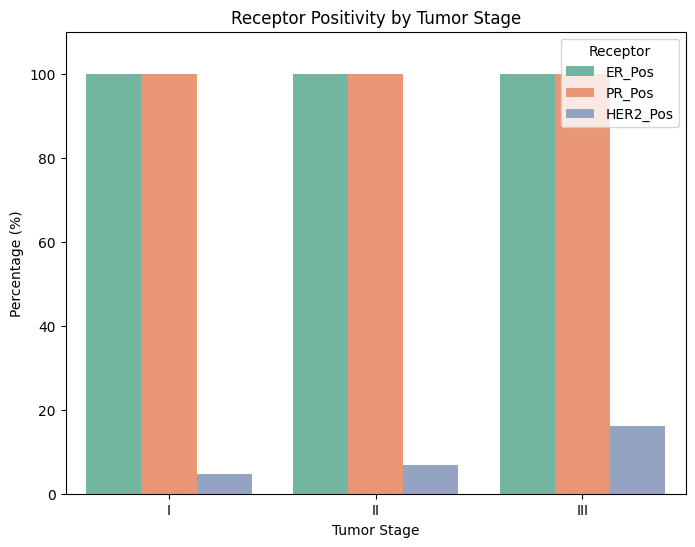

In [24]:

data = {
    'Stage': ['I', 'II', 'III'],
    'ER_Pos': [100, 100, 100],   
    'PR_Pos': [100, 100, 100],
    'HER2_Pos': [4.69, 6.88, 16.05],
    'HER2_Neg': [95.31, 93.12, 83.95]
}

df_receptors = pd.DataFrame(data)


df_melted = df_receptors.melt(id_vars='Stage', 
                              value_vars=['ER_Pos', 'PR_Pos', 'HER2_Pos'], 
                              var_name='Receptor', 
                              value_name='Percentage')


plt.figure(figsize=(8,6))
sns.barplot(x='Stage', y='Percentage', hue='Receptor', data=df_melted, palette='Set2')
plt.title('Receptor Positivity by Tumor Stage')
plt.ylabel('Percentage (%)')
plt.xlabel('Tumor Stage')
plt.ylim(0, 110)
plt.legend(title='Receptor')
plt.show()


Figure 3: Distribution of ER and PR receptor positivity across tumor stages. Both receptors remain consistently positive across all stages, indicating stable hormone receptor expression.


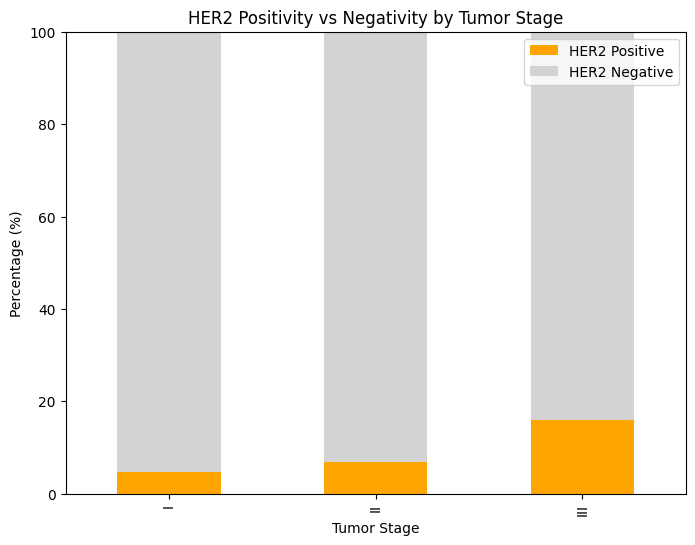

In [25]:
df_her2 = df_receptors[['Stage', 'HER2_Pos', 'HER2_Neg']].set_index('Stage')
df_her2.plot(kind='bar', stacked=True, figsize=(8,6), color=['orange', 'lightgray'])
plt.title('HER2 Positivity vs Negativity by Tumor Stage')
plt.ylabel('Percentage (%)')
plt.xlabel('Tumor Stage')
plt.ylim(0, 100)
plt.legend(['HER2 Positive', 'HER2 Negative'])
plt.show()

Figure 4: Distribution of HER2 receptor positivity across tumor stages. HER2 positivity increases from Stage I (~5%) to Stage III (16%), suggesting a potential association with advanced tumor progression



**Question 4: How do surgical choices vary across tumor stages?**

Here, I will examine whether the distribution of surgical procedures differs between early and more advanced tumor stages. This will potentially reflect the changes in clinical decision-making as the disease progresses.

In [26]:
#Show distribution of surgery type for each tumor stage

query12 = """
SELECT Tumour_Stage, Surgery_Type, COUNT(*) AS surgery_count
FROM brca_cleaned
GROUP BY Tumour_Stage, Surgery_Type
ORDER BY FIELD(Tumour_Stage, 'I', 'II', 'III'), Surgery_Type
;
"""

df_surg_type = pd.read_sql(query12, con = engine)
df_surg_type

,Tumour_Stage,Surgery_Type,surgery_count
0,I,Lumpectomy,22
1,I,Modified Radical Mastectomy,8
2,I,Other,20
3,I,Simple Mastectomy,14
4,II,Lumpectomy,36
5,II,Modified Radical Mastectomy,49
6,II,Other,61
7,II,Simple Mastectomy,43
8,III,Lumpectomy,8
9,III,Modified Radical Mastectomy,39


In [27]:
#Show distribution as percentage for more accurate representation

query13 = """
SELECT Tumour_Stage,
       Surgery_Type,
       COUNT(*) * 100.0 / (SELECT COUNT(*) 
                           FROM brca_cleaned b2 
                           WHERE b2.Tumour_Stage = b1.Tumour_Stage) AS percentage
FROM brca_cleaned b1
GROUP BY Tumour_Stage, Surgery_Type
ORDER BY FIELD(Tumour_Stage, 'I','II','III'), Surgery_Type;
"""

df_surg_percent = pd.read_sql(query13, con = engine)
df_surg_percent

,Tumour_Stage,Surgery_Type,percentage
0,I,Lumpectomy,34.37500
1,I,Modified Radical Mastectomy,12.50000
2,I,Other,31.25000
3,I,Simple Mastectomy,21.87500
4,II,Lumpectomy,19.04762
5,II,Modified Radical Mastectomy,25.92593
6,II,Other,32.27513
7,II,Simple Mastectomy,22.75132
8,III,Lumpectomy,9.87654
9,III,Modified Radical Mastectomy,48.14815


**Summary of Findings**

- Lumpectomy: Most common in Stage I (≈34%), decreases steadily through Stage II (≈19%) to Stage III (≈10%). Suggests preference for breast-conserving surgery in early stages and reduced feasibility for late-stage tumors.
- Modified Radical Mastectomy: Rises sharply from Stage I (12.5%) to Stage III (48.1%), reflecting increased use of aggressive surgery in advanced stages.
- Simple Mastectomy: Appears to be fairly stable in early stages (≈22-32%) across all stages, suggesting these options are chosen for reasons independent of tumor stage.

**Interpretation**

These results show a clear shift from conservative to aggressive surgical approaches as tumor stage advances. The high rate of lumpectomy in early stages aligns with preserving breast tissue when the tumor is localized, while the rise in modified radical mastectomy at later stages reflects the need for more extensive tumor removal. The stable 'Other' category may represent patient-specific or tumor-specific considerations outside stage progression.

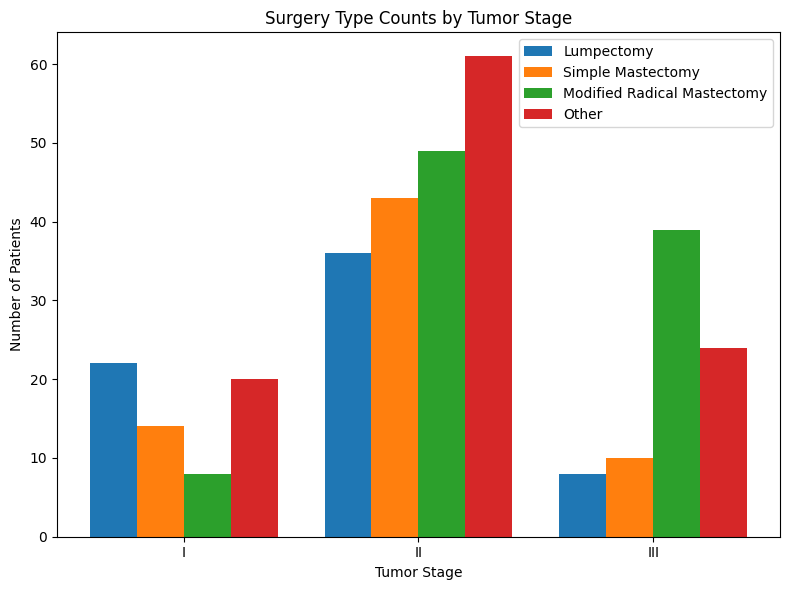

*Figure 5: Distribution of surgery type counts across tumor stages. Shows clear shift from lumpectomy in Stage I to modified radical mastectomy in Stage III.*

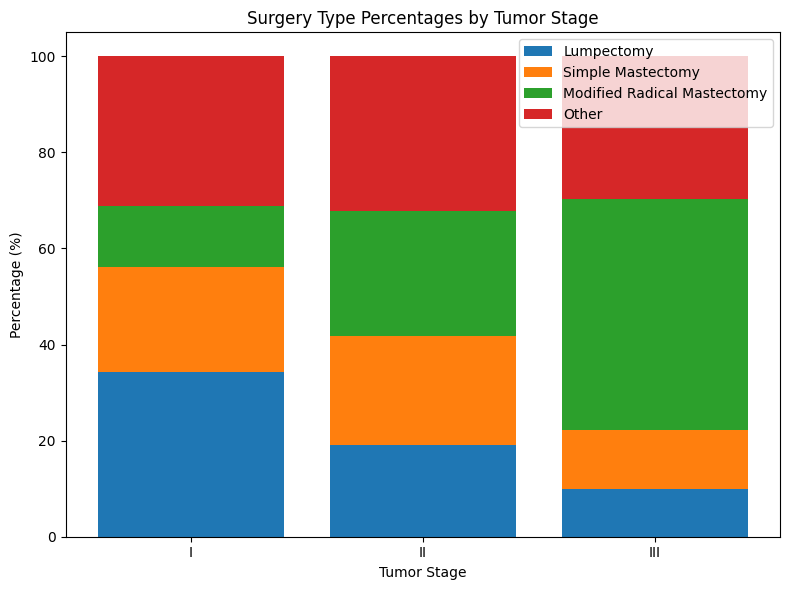

*Figure 6: Percentage breakdown of surgery types by tumor stage. Highlights decreasing lumpectomy rates and increasing radical mastectomy rates with stage progression.*

In [28]:
#Graphs to visualize surgery trends across stages

surgery_counts = pd.DataFrame({
    'Stage': ['I', 'II', 'III'],
    'Lumpectomy': [22, 36, 8],
    'Simple Mastectomy': [14, 43, 10],
    'Modified Radical Mastectomy': [8, 49, 39],
    'Other': [20, 61, 24]
})

surgery_percentages = pd.DataFrame({
    'Stage': ['I', 'II', 'III'],
    'Lumpectomy': [34.375, 19.04762, 9.87654],
    'Simple Mastectomy': [21.875, 22.75132, 12.34568],
    'Modified Radical Mastectomy': [12.5, 25.92593, 48.14815],
    'Other': [31.25, 32.27513, 29.62963]
})


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x = range(len(surgery_counts['Stage']))

for i, col in enumerate(surgery_counts.columns[1:]):
    ax.bar([pos + i*bar_width for pos in x], 
           surgery_counts[col], 
           width=bar_width, 
           label=col)

ax.set_xticks([pos + bar_width*1.5 for pos in x])
ax.set_xticklabels(surgery_counts['Stage'])
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Tumor Stage")
ax.set_title("Surgery Type Counts by Tumor Stage")
ax.legend()
plt.tight_layout()
plt.show()


from IPython.display import display, Markdown
display(Markdown("*Figure 5: Distribution of surgery type counts across tumor stages. Shows clear shift from lumpectomy in Stage I to modified radical mastectomy in Stage III.*"))


fig, ax = plt.subplots(figsize=(8, 6))
bottom_vals = [0] * len(surgery_percentages['Stage'])

for col in surgery_percentages.columns[1:]:
    ax.bar(surgery_percentages['Stage'], 
           surgery_percentages[col], 
           bottom=bottom_vals, 
           label=col)
    bottom_vals = [i + j for i, j in zip(bottom_vals, surgery_percentages[col])]

ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Tumor Stage")
ax.set_title("Surgery Type Percentages by Tumor Stage")
ax.legend()
plt.tight_layout()
plt.show()


display(Markdown("*Figure 6: Percentage breakdown of surgery types by tumor stage. Highlights decreasing lumpectomy rates and increasing radical mastectomy rates with stage progression.*"))



**Question 5: What impact do tumor stage and receptor status have on patient survival?**

Here, I will examine how tumor stage (I, II, III) and receptor status (Er, PR, HER2) influence patient survival by comparing survival outcomes across stages and receptor profiles.

Will begin by looking at the average survival_days for each tumor stage.

In [29]:
#Average survival days for each tumor stage

query14 = """
SELECT Tumour_Stage, AVG(survival_days)
FROM brca_cleaned
GROUP BY Tumour_Stage
order by Tumour_Stage 
;
"""

df_stage_surv_days = pd.read_sql(query14, con = engine)
df_stage_surv_days


,Tumour_Stage,AVG(survival_days)
0,I,547.283333
1,II,449.866667
2,III,365.350649


Now, will filter for tumor stage, receptor status, patient status, and survival day stats to see if there are any notable trends with receptor status and patient survival.

In [30]:
#Filters out tumor stage, recepetor statuses, patient status, and survival day stats

query15 = """
SELECT
    Tumour_Stage,
    `ER status`,
    `PR status`,
    `HER2 status`,
    COUNT(*) AS patient_count,
    AVG(survival_days) AS avg_survival_days,
    MIN(survival_days) AS min_survival_days,
    MAX(survival_days) AS max_survival_days,
    SUM(CASE WHEN Patient_Status = 'Dead' THEN 1 ELSE 0 END) AS deaths,
    SUM(CASE WHEN Patient_Status = 'Alive' THEN 1 ELSE 0 END) AS alive
FROM brca_cleaned
GROUP BY Tumour_Stage, `ER status`, `PR status`, `HER2 status`
ORDER BY Tumour_Stage, `ER status`, `PR status`, `HER2 status`;
"""

df_surg_out_percent = pd.read_sql(query15, con = engine)
df_surg_out_percent

,Tumour_Stage,ER status,PR status,HER2 status,patient_count,avg_survival_days,min_survival_days,max_survival_days,deaths,alive
0,I,Positive,Positive,Negative,61,558.105263,23.0,2763.0,9.0,49.0
1,I,Positive,Positive,Positive,3,341.666667,272.0,456.0,1.0,2.0
2,II,Positive,Positive,Negative,176,462.071856,0.0,3019.0,37.0,132.0
3,II,Positive,Positive,Positive,13,293.076923,19.0,756.0,1.0,12.0
4,III,Positive,Positive,Negative,68,355.546875,7.0,1519.0,16.0,49.0
5,III,Positive,Positive,Positive,13,413.615385,90.0,804.0,2.0,11.0


**Summary of Findings**

- Overall by Stage (regardless of receptor status)
  - Stage I: Average survival ≈547 days (≈1.5 years)
  - Stage II: Average survival ≈450 days (≈1.2 years)
  - Stage III: Average survival ≈365 days (≈1 year)
  - Pattern: Survival appears to decrease steadily with advancing tumor stage.

- By Stage + Receptor Status:

- Stage I
  - HER2 Negative (ER+/PR+): Highest survival (avg ≈558 days)
  - HER2 Positive (ER+/PR+): Lowest survival (avg ≈342 days)
- Stage II
  - HER2 Negative (ER+/PR+): Avg ≈ 4662 days, ≈21% mortality
  - HER2 Positive (ER+/PR+): Lower survival (avg ≈293 days), few deaths )though possibly do to sample size)
- Stage III
  - HER2 Negative (ER+/PR+): Lowest survival (avg≈356 days)
  - HER2 Positive (ER+/PR+): Slightly better survival than HER2 negative Stage III (avg≈414 days), but sample size is small (13 patients)


**Interpretation**

Tumor stage has a clear and consistent impact on patient survival, with average survival decreasing steadily from Stage I to Stage III. HER2 status appears to influence survival differently depending on the stage: in the early stages (I-II), HER2 positivity is associated with lower survival, whereas in Stage III, HER2-positive patients show slightly higher survival, possibly due to targeted therapies or the small sample size. ER and PR receptors are uniformly positive in this dataset, so their effects cannot be evaluated. I also believe it is important to note that small sample sizes, particularly for HER2-positive patients in early stages, may limit the reliability of some observed trends. Overall, these patterns highlight that both tumor stage and receptor status can provide insights into patient prognosis, though interpretation should consider sample size limitations.

<Axes: xlabel='Tumour_Stage', ylabel='Average_Survival_Days'>

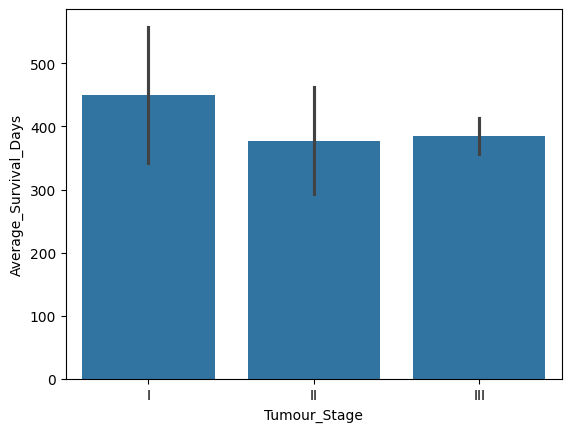

In [31]:
#Visualize patient survival based on tumor stage

data = {
    'Tumour_Stage': ['I','I','II','II','III','III'],
    'HER2_Status': ['Negative','Positive','Negative','Positive','Negative','Positive'],
    'Average_Survival_Days': [558.11, 341.67, 462.07, 293.08, 355.55, 413.62],
    'Patient_Count': [61, 3, 176, 13, 68, 13],
    'Deaths': [9, 1, 37, 1, 16, 2],
    'Alive': [49, 2, 132, 12, 49, 11]
}

df_survival = pd.DataFrame(data)

df_survival



sns.barplot(x='Tumour_Stage', y='Average_Survival_Days', data=df_survival)



Figure 7: Average patient survival by tumor stage. Survival decreases as tumor stage advances, with Stage III patients showing the lowest average survival.


<Axes: xlabel='Tumour_Stage', ylabel='Average_Survival_Days'>

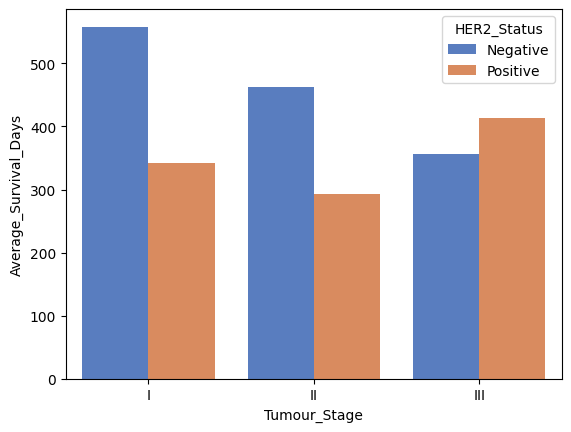

In [32]:

sns.barplot(
    x='Tumour_Stage', 
    y='Average_Survival_Days', 
    hue='HER2_Status', 
    data=df_survival, 
    errorbar=None,  # replaces ci=None
    palette='muted'
)


Figure 8: Average patient survival by tumor stage and HER2 status. HER2-positive patients tend to have lower survival in early stages, but effects vary in Stage III.


## Statistical Testing


**ANOVA TEST:** A one-way ANOVA test will be performed on each protein to determine whether expression levels significantly differed across tumor stages (I, II, III).

In [33]:
from scipy.stats import f_oneway

proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

for protein in proteins:
    stage_I = df[df['Tumour_Stage'] == 'I'][protein]
    stage_II = df[df['Tumour_Stage'] == 'II'][protein]
    stage_III = df[df['Tumour_Stage'] == 'III'][protein]
    
    f_stat, p_val = f_oneway(stage_I, stage_II, stage_III)
    
    print(f"{protein} ANOVA: F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")
    
    if p_val < 0.05:
        print(f"  → Significant difference detected in {protein} levels across tumor stages.\n")
    else:
        print(f"  → No significant difference detected in {protein} levels across tumor stages.\n")


Protein1 ANOVA: F-statistic = 0.697, p-value = 0.4991
  → No significant difference detected in Protein1 levels across tumor stages.

Protein2 ANOVA: F-statistic = 0.498, p-value = 0.6080
  → No significant difference detected in Protein2 levels across tumor stages.

Protein3 ANOVA: F-statistic = 0.693, p-value = 0.5006
  → No significant difference detected in Protein3 levels across tumor stages.

Protein4 ANOVA: F-statistic = 0.253, p-value = 0.7768
  → No significant difference detected in Protein4 levels across tumor stages.



**Interpretation:** 

None of the proteins exhibit statistically significant differences in average expression between tumor stages. While trends in averages were observed during exploratory analysis, these differences are not strong enough to be deemed significant. This suggests that protein expression alone may not reliably predict tumor stage in this dataset.


**Chi-Square Test:** A chi-square test is performed to examine whether HER2 receptor status is associated with tumor stage. The contingency table included counts of HER2-positive and HER2-negative patients across Stages I, II, and III.

In [34]:

from scipy.stats import chi2_contingency

data = [[3, 61],
        [13, 176],
        [13, 68]]

df_chi= pd.DataFrame(data, columns = ['HER2_Pos', 'HER2_Neg'], index = ['Stage I',
                                                                     'Stage '
                                                                     'II',
                                                                     'Stage '
                                                                     'III'])
chi2, p, dof, expected = chi2_contingency(df_chi)


print("chi2: ", chi2)
print("degrees of freedom: ", dof)
print("P-val: ", p)
print("expected freq: ", expected)

chi2:  7.608517439281055
degrees of freedom:  2
P-val:  0.022275703588921718
expected freq:  [[  5.55688623  58.44311377]
 [ 16.41017964 172.58982036]
 [  7.03293413  73.96706587]]


**Interpretation:**
Since the p-value is less than 0.05, we conclude that HER2 positivity is statistically significantly associated with tumor stage. This indicates that the distribution of HER2-positive tumors differs across stages, with higher prevalence in later stages.

**Chi-Square Test:** Another chi-square test will be performed to evaluate whether or not the distribution of surgical procedures varies across tumor stages. The test compares the observed counts of each surgery type at each stage with the expected counts if there were no association. 

In [35]:
import pandas as pd
from scipy.stats import chi2_contingency


data = {'Lumpectomy': [22, 36, 8],
        'Simple Mastectomy': [14, 43, 10],
        'Modified Radical Mastectomy': [8, 49, 39],
        'Other': [20, 61, 24]}
df_surgery = pd.DataFrame(data, index=['Stage I', 'Stage II', 'Stage III'])


chi2, p, dof, expected = chi2_contingency(df_surgery)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
print("Expected frequencies:\n", expected)


Chi-square statistic: 31.29676547403389
Degrees of freedom: 6
P-value: 2.224702333029871e-05
Expected frequencies:
 [[12.64670659 12.83832335 18.39520958 20.11976048]
 [37.34730539 37.91317365 54.32335329 59.41616766]
 [16.00598802 16.24850299 23.28143713 25.46407186]]


**Interpretation:**

The significant p-value 2.224702333029871e-05 (< 0.05) indicates that surgery type is associated with tumor stage. Less aggressive surgeries (lumpectomy) are more common in early stages, while more aggressive surgeries (modified radical mastectomy) are more frequent in later stages. This aligns with clinical expectations and reinforces the trends observed in the exploratory analysis section.

**Spearman Correlation:** A Spearman correlation will be computed between patient age and survival days to assess monotonic relationships.

Spearman correlation between Age and Survival Days: -0.039
P-value: 0.492


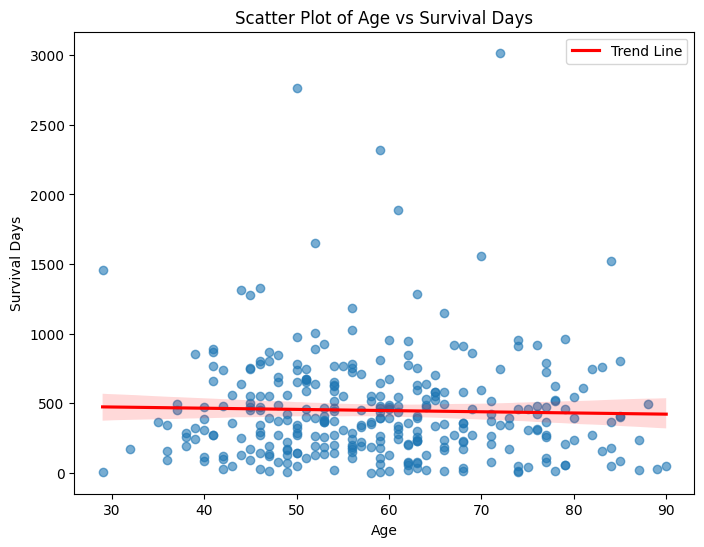

In [36]:
from scipy.stats import spearmanr

# Drop rows with missing Age or survival_days
df_clean = df.dropna(subset=['Age', 'survival_days'])

# Compute Spearman correlation
corr, p_value = spearmanr(df_clean['Age'], df_clean['survival_days'])

print(f"Spearman correlation between Age and Survival Days: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(
    x='Age', 
    y='survival_days', 
    data=df, 
    scatter_kws={'alpha':0.6},  # make points semi-transparent
    line_kws={'color':'red', 'label':'Trend Line'}
)
plt.title('Scatter Plot of Age vs Survival Days')
plt.xlabel('Age')
plt.ylabel('Survival Days')
plt.legend()
plt.show()


Figure 9: Age vs Survival Days

Scatter plot showing the relationship between patient age and survival days. The red line indicates the trend. Spearman correlation = -0.039, p = 0.492, suggesting no significant association between age and survival.



**Interpretation:**

The correlation was very weak (ρ = -0.039) and not statistically significant (p = 0.492), suggesting that age does not meaningfully impact survival in this dataset.

## Conclusions

This exploratory analysis highlights several key trends in the breast cancer dataset:

- Tumor Stage and Age: Average patient age decreases with advancing tumor stage, and age variability is higher in early-stage patients. Spearman correlation between age and survival days is -0.039 (p = 0.492), indicating no significant association.
- Protein Expression: Proteins 1, 2, and 4 show decreasing levels as tumor stage progresses, suggesting potential as biomarkers. ANOVA tests confirmed that differences across stages were not statistically significant (all p > 0.05), indicating that observed trends may reflect small effect sizes or sample variability. Protein 3 behaves non-linearly, indicating a more complex relationship with tumor progression.
- Receptor Status: ER and PR are consistently positive across stages. HER2 positivity increases in later stages, and chi-square analysis confirmed a statistically significant association between HER2 status and tumor stage (χ² ≈ 7.61, p = 0.022), reinforcing that HER2 is more prevalent in advanced stages.
- Surgical Choices: Less invasive surgeries (lumpectomy) are more common in early stages, while aggressive surgeries (modified radical mastectomy) dominate in later stages. Chi-square analysis showed a strong association between surgery type and tumor stage (χ² ≈ 31.30, p < 0.001). “Other” procedures remain fairly stable across stages.
- Survival: Patient survival declines with tumor stage. HER2-positive patients generally have lower survival in early stages, but Stage III shows slightly higher survival, possibly due to targeted therapies or small sample sizes. ER and PR effects on survival could not be evaluated due to uniform positivity.

Overall: Tumor stage strongly influences survival, surgical decisions, and protein expression patterns. Statistical testing confirms the stage-dependence of HER2 status and surgical choices. Certain proteins may serve as progression biomarkers, though further research with larger samples is needed to validate their significance.

## Limitations & Future Work

Some subgroup sizes are small (e.g., HER2-positive patients in early stages), which may affect reliability. Survival analyses may be influenced by missing data or unmeasured factors. Future analyses could use larger datasets, include more clinical variables, and explore predictive models to better understand how tumor biology affects outcomes.